In [2]:
from py_ball import league




headers = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    ),
    "Referer": "https://stats.nba.com/",
    "Accept": "application/json, text/plain, */*",
}



# 2) Pass that dict — not the Response — into League(...)
league_id = '00'  # WNBA
franchises = league.League(
    headers=headers,
    endpoint="leaguegamelog",
    league_id=league_id,
    season_id="2023-2024",
    season_type="Playoffs"
)



In [3]:
import pandas as pd
import numpy as np

In [4]:


season_df = pd.DataFrame(franchises.data["LeagueGameLog"])

In [5]:
season_df['GAME_DATE'] = pd.to_datetime(season_df['GAME_DATE'])
season_df

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,42024,1630598,Aaron Wiggins,1610612760,OKC,Oklahoma City Thunder,0042400405,2025-06-16,OKC vs. IND,W,...,5,0,0,1,1,1,14,-5,22.0,1
1,42024,1628418,Thomas Bryant,1610612754,IND,Indiana Pacers,0042400405,2025-06-16,IND @ OKC,L,...,1,1,0,0,0,0,0,2,2.7,1
2,42024,1627783,Pascal Siakam,1610612754,IND,Indiana Pacers,0042400405,2025-06-16,IND @ OKC,L,...,6,5,3,2,6,3,28,-5,51.7,1
3,42024,1641767,Ben Sheppard,1610612754,IND,Indiana Pacers,0042400405,2025-06-16,IND @ OKC,L,...,1,1,0,0,1,0,0,-6,1.7,1
4,42024,1630174,Aaron Nesmith,1610612754,IND,Indiana Pacers,0042400405,2025-06-16,IND @ OKC,L,...,6,0,1,0,2,5,14,-12,22.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,42024,201566,Russell Westbrook,1610612743,DEN,Denver Nuggets,0042400171,2025-04-19,DEN vs. LAC,W,...,8,3,2,0,1,3,15,7,34.1,1
1749,42024,201935,James Harden,1610612746,LAC,LA Clippers,0042400171,2025-04-19,LAC @ DEN,L,...,6,11,0,1,2,5,32,0,56.7,1
1750,42024,202695,Kawhi Leonard,1610612746,LAC,LA Clippers,0042400171,2025-04-19,LAC @ DEN,L,...,6,2,3,0,7,3,22,-2,34.2,1
1751,42024,203932,Aaron Gordon,1610612743,DEN,Denver Nuggets,0042400171,2025-04-19,DEN vs. LAC,W,...,8,1,2,0,3,2,25,0,39.1,1


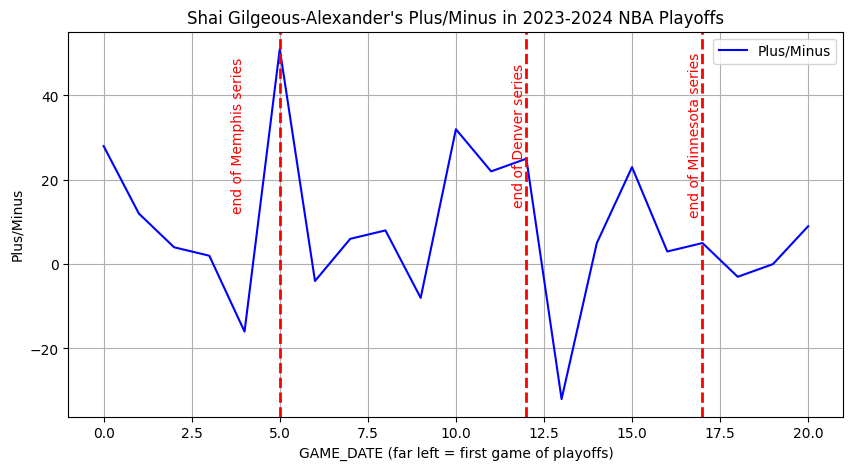

In [6]:
import matplotlib.pyplot as plt

# Filter and prepare the data
shai_df = season_df[season_df.PLAYER_NAME.str.contains("Shai")]
shai_df = shai_df.sort_values(by="GAME_DATE")
plus_minus_series = shai_df["PLUS_MINUS"].reset_index(drop=True)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(plus_minus_series, linestyle='-', color='blue', label="Plus/Minus")

# Add plot details
plt.title("Shai Gilgeous-Alexander's Plus/Minus in 2023-2024 NBA Playoffs")
plt.xlabel("GAME_DATE (far left = first game of playoffs)")
plt.ylabel("Plus/Minus")
plt.grid(True)
plt.legend()

# Add vertical line at index 5
plt.axvline(x=5, color='red', linestyle='--', linewidth=2)
plt.text(4, plus_minus_series.max() * 0.6, 'end of Memphis series', color='red', rotation=90,
         verticalalignment='center', horizontalalignment='right')


plt.axvline(x=12, color='red', linestyle='--', linewidth=2)
plt.text(12, plus_minus_series.max() * 0.6, 'end of Denver series', color='red', rotation=90,
         verticalalignment='center', horizontalalignment='right')





plt.axvline(x=17, color='red', linestyle='--', linewidth=2)
plt.text(17, plus_minus_series.max() * 0.6, 'end of Minnesota series', color='red', rotation=90,
         verticalalignment='center', horizontalalignment='right')

# Show the plot
plt.show()


### PLAYER CLASS

| **Metric**       | **Full Name**           | **Description**                                                                 | **Interpretation**                                                                 |
|------------------|--------------------------|----------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| `USG_PCT`        | Usage Percentage         | % of team plays used by a player while on the court                             | Higher = more offensive responsibility                                            |
| `AST_PCT`        | Assist Percentage        | % of teammate field goals assisted by player while on floor                     | Higher = better playmaking                                                        |
| `E_USG_PCT`      | Estimated Usage %        | Tracking-based estimate of player usage (touches, actions)                      | More accurate than USG_PCT (includes off-ball activity)                          |
| `E_USG_PCT_RANK` | Estimated Usage Rank     | Rank of player's `E_USG_PCT` across all players                                 | 1 = most used player                                                              |
| `OFF_RATING`     | Offensive Rating         | Points produced per 100 possessions                                              | Higher = more efficient offensively                                               |
| `DEF_RATING`     | Defensive Rating         | Points allowed per 100 possessions                                               | Lower = better defender                                                           |
| `NET_RATING`     | Net Rating               | OFF_RATING - DEF_RATING                                                          | Positive = team does better with player on floor                                  |
| `TS_PCT`         | True Shooting %          | Adjusted shooting efficiency (accounts for FT & 3PT)                             | Higher = more efficient scorer                                                    |
| `EFG_PCT`        | Effective FG %           | Weighted shooting % (3PT worth more than 2PT)                                    | Better shooting accuracy than FG% alone                                           |
| `PACE`           | Pace                     | Estimated team possessions per 48 minutes                                        | Higher = faster playing style                                                     |
| `TO_PCT`         | Turnover Percentage      | % of possessions ending in a turnover                                            | Lower = better ball control                                                       |
| `REB_PCT`        | Rebound Percentage       | % of available rebounds player grabbed                                           | Indicates rebounding impact (split into OREB%, DREB% too)                         |


In [7]:
from py_ball import league,player,league_dash,boxscore

# 1) Re-use the dict you built for requests.get(...)
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    ),
    "Referer": "https://stats.nba.com/",
    "Accept": "application/json, text/plain, */*",
}

# 2) Pass that dict — not the Response — into League(...)
league_id = '00'  # NBA
players = league_dash.LeagueDash(
    headers=headers,
    endpoint="LeagueDashPlayerStats",
    league_id=league_id,
    season="2024-25",
    measure_type="Advanced",
    season_type="Playoffs"

)



In [8]:
player_metrics = pd.DataFrame(players.data["LeagueDashPlayerStats"])
player_metrics

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
0,1631260,AJ Green,AJ,1610612749,MIL,25.0,5,1,4,0.200,...,159,128,117,117,126,101,105,79,76,89
1,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,14,7,7,0.500,...,103,126,146,146,86,20,21,40,43,68
2,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,3,3,0,1.000,...,60,79,28,28,172,156,150,135,126,141
3,1630174,Aaron Nesmith,Aaron,1610612754,IND,25.0,21,14,7,0.667,...,114,65,87,87,97,15,16,55,64,72
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,26.0,20,14,6,0.700,...,77,30,36,36,116,47,43,102,101,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1628427,Vlatko Čančar,Vlatko,1610612743,DEN,28.0,3,2,1,0.667,...,210,28,42,42,194,204,218,204,218,204
215,1628976,Wendell Carter Jr.,Wendell,1610612753,ORL,26.0,5,1,4,0.200,...,145,165,197,197,70,92,102,61,73,42
216,1630214,Xavier Tillman,Xavier,1610612738,BOS,26.0,1,0,1,0.000,...,81,206,196,196,124,188,186,147,118,189
217,1641744,Zach Edey,Zach,1610612763,MEM,23.0,4,0,4,0.000,...,201,40,53,53,109,126,138,95,121,20


In [9]:
players = league_dash.LeagueDash(
    headers=headers,
    endpoint="LeagueDashTeamStats",
    league_id=league_id,
    season="2024-25",
    measure_type="Advanced",
    season_type="Playoffs"

)
team_metrics =  pd.DataFrame(players.data["LeagueDashTeamStats"])
team_metrics

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK
0,1610612738,Boston Celtics,11,6,5,0.545,533.0,110.9,114.4,105.1,...,9,11,9,13,9,8,7,7,15,3
1,1610612739,Cleveland Cavaliers,9,5,4,0.556,432.0,119.7,122.6,109.3,...,4,8,5,2,1,2,3,2,6,2
2,1610612743,Denver Nuggets,14,7,7,0.500,682.0,106.6,109.3,112.9,...,13,10,3,3,3,12,11,11,7,11
3,1610612765,Detroit Pistons,6,2,4,0.333,288.0,106.2,109.4,107.5,...,15,12,6,6,4,14,12,9,4,9
4,1610612744,Golden State Warriors,12,5,7,0.417,576.0,106.4,108.6,109.3,...,6,5,8,15,13,10,13,14,10,10
5,1610612745,Houston Rockets,7,3,4,0.429,336.0,109.5,111.5,107.9,...,11,13,1,5,2,9,14,12,11,6
6,1610612754,Indiana Pacers,21,14,7,0.667,1018.0,113.5,115.9,111.2,...,3,2,15,11,12,6,1,1,3,4
7,1610612746,LA Clippers,7,3,4,0.429,341.0,113.8,115.9,111.6,...,1,1,12,14,14,3,2,3,13,7
8,1610612747,Los Angeles Lakers,5,1,4,0.200,240.0,107.8,109.1,111.9,...,10,7,13,16,15,11,9,6,14,12
9,1610612763,Memphis Grizzlies,4,0,4,0.000,192.0,95.9,97.6,115.2,...,16,16,11,4,7,16,15,15,1,15


In [10]:
player_metrics[player_metrics["MIN"]>=20].sort_values(by="NET_RATING",ascending=False)[["NET_RATING","PLAYER_NAME","PLAYER_ID"]].head(10)

#NET RATING rank does not check number of minutes so they are not giving the full picture for star players

,NET_RATING,PLAYER_NAME,PLAYER_ID
209,17.3,Ty Jerome,1629660
49,15.7,De'Andre Hunter,1629631
37,15.3,Cason Wallace,1641717
196,14.1,Steven Adams,203500
8,14.1,Alex Caruso,1627936
98,13.0,Jarrett Allen,1628386
38,12.9,Chet Holmgren,1631096
106,12.4,Jayson Tatum,1628369
177,12.3,Payton Pritchard,1630202
149,11.8,Max Strus,1629622


In [11]:
player_metrics[player_metrics["MIN"]>=20].sort_values(by="DEF_RATING",ascending=True)[["DEF_RATING","PLAYER_NAME","PLAYER_ID"]].head(15)

#less is more for def rating 

,DEF_RATING,PLAYER_NAME,PLAYER_ID
37,100.6,Cason Wallace,1641717
8,101.1,Alex Caruso,1627936
196,101.4,Steven Adams,203500
106,101.8,Jayson Tatum,1628369
38,102.0,Chet Holmgren,1631096
185,103.7,Rudy Gobert,203497
18,103.8,Ausar Thompson,1641709
10,104.0,Alperen Sengun,1630578
84,104.2,Jabari Smith Jr.,1631095
193,104.9,Shai Gilgeous-Alexander,1628983


In [12]:
# TODO
# https://www.nba.com/stats/players/boxscores-advanced burayı ekle

### GETTING ADVANCED METRICS FOR EACH GAME

In [14]:
def get_advanced_stats_gamebygame(player_name : str , season_type : str):

    """
    get advanced stats PLAY-BY-PLAY for selected player
    """

    league_id = '00'  # NBA
    games = league.League(
        headers=headers,
        endpoint="leaguegamelog",
        league_id=league_id,
        season_id="2024-2025",
        season_type=season_type
    )
    all_games = pd.DataFrame(games.data["LeagueGameLog"])
    playoff_game_for_player = all_games[all_games["PLAYER_NAME"] == player_name].GAME_ID.to_list()
    all_stats = []

    for game_id in playoff_game_for_player:
        adv = boxscore.BoxScore(headers=headers,
                                endpoint="boxscoreadvancedv2",
                                game_id=game_id)
        # pick only entries matching name
        filtered = [s for s in adv.data["PlayerStats"]
                    if s["PLAYER_NAME"] == player_name]
        all_stats.extend(filtered)

    df_player = pd.DataFrame(all_stats)
    return df_player


In [15]:
p = get_advanced_stats_gamebygame(player_name="T.J. McConnell", season_type="Playoffs")

KeyboardInterrupt: 

In [ ]:
team_metrics[team_metrics["TEAM_NAME"]=="Oklahoma City Thunder"].PACE

14    100.34
Name: PACE, dtype: float64

In [ ]:
p.PACE

0      98.24
1     101.84
2     103.48
3     101.03
4     106.23
5     101.09
6      97.58
7      98.63
8      97.30
9      94.91
10    101.61
11    107.04
12    103.69
13     99.09
14    101.24
15    108.29
16    101.68
17    104.68
18    100.85
19    101.71
20    111.46
Name: PACE, dtype: float64